In [1]:
#For Signal Compression
import numpy as np
import pywt
from pywt import wavedec
import scipy.io.wavfile
import matplotlib.pyplot as plt
from numpy import linalg as LA

#For Creating new WAV file
from scipy.io.wavfile import write

#For Encoding and Decoding
from itertools import groupby
#from scipy.io import wavfile



#For Getting the Frequeny of the Signal
from scipy.fftpack import fft
import plotly.plotly as py
import plotly.graph_objs as go

#For Signal Denoising
from scipy import signal
from scipy.signal import lfilter
from scipy.signal import filtfilt

#For Peak Detection
from scipy.signal import hilbert
import peakutils
from peakutils.plot import plot as pplot
from peakutils.peak import indexes


#For Classification
import glob
import os
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
from matplotlib.pyplot import specgram
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [3]:
sample_rate, signal1 = scipy.io.wavfile.read('Normals.wav')  # File assumed to be in the same directory
signal1=signal1[:,0];
signals = signal1[0:int(4.5 * sample_rate)]  # Keep the first 3.5 seconds
signal2=signals
signal = (np.array(signals))/(np.max(np.array(signals)))
#signal=0.5*signal
T=1/sample_rate
Timelimit = np.arange(0, (len(signal))*T,T)
lines=[]
coefffs=pywt.wavedec(signal2,'bior4.4',level=7)
n=len(signal2)
CA17,CD17,CD16,CD15,CD14,CD13,CD12,CD11=coefffs
def reconstruction_plot(coefficient_name1,coefficient_name2,wavelet_name,level2,**kwargs):
    n=len(signal2)
    PCD4200 =pywt.upcoef(coefficient_name1, coefficient_name2, wavelet_name, level2,take=n)
    PCA4200=PCD4200
    return PCA4200
        
A7=reconstruction_plot('a',coefffs[0],'bior4.4',7)

for i in range(1,8):
    D=reconstruction_plot('d',coefffs[i],'bior4.4',8-i)
    lines.append(D)
    #print ("i=",i)
print("Length of Lines: ",len(lines))

plt.figure(figsize=(20, 30))
plt.subplot(9, 1, 1)
plt.plot(Timelimit,signal2)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.figure(figsize=(20, 30))
plt.subplot(9, 1, 2)
plt.plot(Timelimit,A7)
plt.title('Signal using only approximate coefficents of level 7')
plt.xlabel('Time')
plt.ylabel('Amplitude')
for i in range(len(lines)):
    plt.figure(figsize=(20,30)) 
    plt.subplot(len(lines)+2, 1, i+3)
    plt.plot(Timelimit,lines[i])
    plt.title('Signal using only Detailed coefficents of level %i' %(7-i))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    #print (i)

Length of Lines:  7


In [4]:
N=len(signal2)
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
# FFT algorithm
yr = fft(signal2) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only
trace0 = go.Scatter(x=x,y=y)
data = [trace0]
#py.iplot(data, filename = 'basic-line')

In [5]:
##SIGNAL COMPRESSION##

level=6
arr1=[]
totalenergy=0

for i in range(level+1):
    coeffs=pywt.wavedec(signal,'db20',level=level)
    #coeffs3=pywt.wavedec(signal,'db20',level=level)
    energy=np.sum((np.array(coeffs[i]))**2)
    totalenergy+=energy
    arr1.append(energy)
    print ("Energy of coeffs[",i,"]=",energy)
    print ("Length of coeffs[",i,"]=",len(coeffs[i]))
print ("Length of the Original Signal (Summation of all the Coefficients: )", len(signal))
coeffs3=coeffs[0:7]
#print (counter1)  
a=(arr1[0]/totalenergy)*100
print(" ")
print("percentage of energy of Approximate Coefficents= ",a,'%')
arr2=arr1[1:6]
energy2=np.sum(arr2)
b=(energy2/totalenergy)*100
print("percentage of energy of Detail Coefficents= ",b,'%')
c=a+b
print("percentage of Total Energy(Approximate+Detail coefficients)=","%.3f" % c,'%')
arr3=[]
arr4=[]
for i in range(1,7):
    arr3.append(coeffs[i])

for j in arr3:
    for i in j:
        arr4.append(i)
       
energies=0
n1=0  
b1=(np.sum(np.square(coeffs[0])))
b2=(np.sum(np.square(coeffs[1])))


E=totalenergy-(b1+b2)
print(" ")
print ("Energy of Detailed Coefficients from Level 1 to Level 5: ",E)
Es=0.50*E
print ("50 Percent of Energy of Detailed Coefficients from Level 1 to Level 5 : ",Es)
C1=np.absolute(arr4)
C1.sort()
Cs = sorted(C1, reverse=True)

while energies <Es:
    energies= energies+(Cs[n1])**2
    n1 += 1

#print ("energies: ",energies)    
thr=Cs[n1]
print ("The Value of Threshold for Compression: ",thr)

for i in range(2,7):
    coeffs[i] = np.where(coeffs[i] <thr,0, coeffs[i])

arr5=[]
for i in range(len(coeffs)):
    arr5.append(coeffs[i])

arr6=[]
arr7=[]
for i in coeffs3:
    for j in i:
        arr6.append(j)
        
for i in arr5:
    for j in i:
        arr7.append(j)

print(" ")
print("Length of the Signal before Thresholding", len(arr6))
print("length of the Signal after Thresholding", len(arr7))
print("Significant Coefficients before Thresholding", np.count_nonzero(arr6))
print("Significant Coefficients after Thresholding", np.count_nonzero(arr7))

a=np.count_nonzero(arr6)
b=np.count_nonzero(arr7)
Nonzero=((a-b)/a)*100
print("Percentage of reduction of Significant Coefficients after Thresholding: ", Nonzero,'%')


Energy of coeffs[ 0 ]= 6259.3539376300905
Length of coeffs[ 0 ]= 3139
Energy of coeffs[ 1 ]= 0.2055715578876923
Length of coeffs[ 1 ]= 3139
Energy of coeffs[ 2 ]= 0.0026096044180559863
Length of coeffs[ 2 ]= 6239
Energy of coeffs[ 3 ]= 1.4717051493818791e-05
Length of coeffs[ 3 ]= 12439
Energy of coeffs[ 4 ]= 5.871721157129871e-06
Length of coeffs[ 4 ]= 24840
Energy of coeffs[ 5 ]= 9.768516780255031e-06
Length of coeffs[ 5 ]= 49641
Energy of coeffs[ 6 ]= 1.5835325542686128e-05
Length of coeffs[ 6 ]= 99244
Length of the Original Signal (Summation of all the Coefficients: ) 198450
 
percentage of energy of Approximate Coefficents=  99.99667345176174 %
percentage of energy of Detail Coefficents=  0.0033262952600723633 %
percentage of Total Energy(Approximate+Detail coefficients)= 100.000 %
 
Energy of Detailed Coefficients from Level 1 to Level 5:  0.002655797034094576
50 Percent of Energy of Detailed Coefficients from Level 1 to Level 5 :  0.001327898517047288
The Value of Threshold for 

In [9]:
##CREATING AUDIO SIGNAL
data1 = np.int16(arr7/np.max(np.abs(arr7)) * 32767)
write('originalsignal.wav', 44100, data1)

In [10]:
# ENCODING THE SIGNAL
samplerate, data = scipy.io.wavfile.read('originalsignal.wav')

def encode2(sequence):
    return [(len(list(b)), a) for a, b in groupby(sequence)]

encoded2 = encode2(data)
print ("Length of the signal after Encoding: ",len(encoded2))

Length of the signal after Encoding:  5917


In [11]:
#CREATING WAV FILE USING ENCODED SIGNAL
data2 = np.int16(encoded2/np.max(np.abs(encoded2)) * 32767)
write('compressedencodedsignal.wav', 44100, data2)

In [12]:
#DECODING THE SIGNAL
def decode2(compressed):
    return [x for y in [[c] * n for n, c in compressed] for x in y]

decoded2=decode2(encoded2);
print ("Length of the signal after Encoding: ",len(decoded2))

Length of the signal after Encoding:  198681


Percent Root Mean Square Differeence:  0.06510690367489577 %
Percentage of reconstruction:  99.99995759897894 %


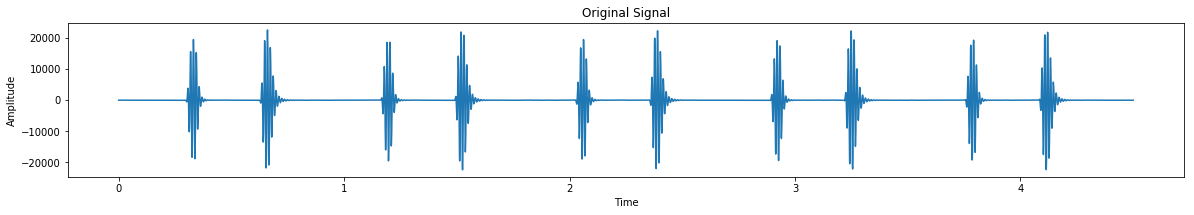

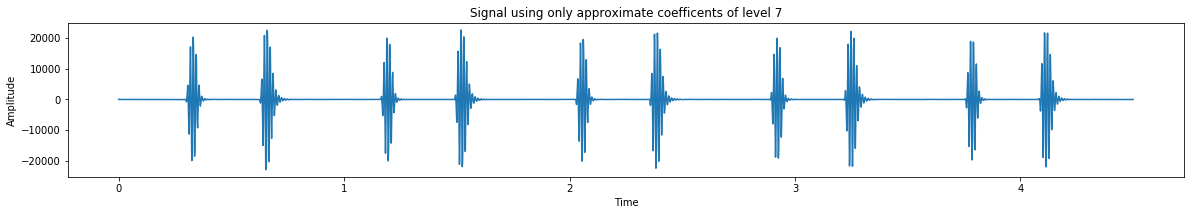

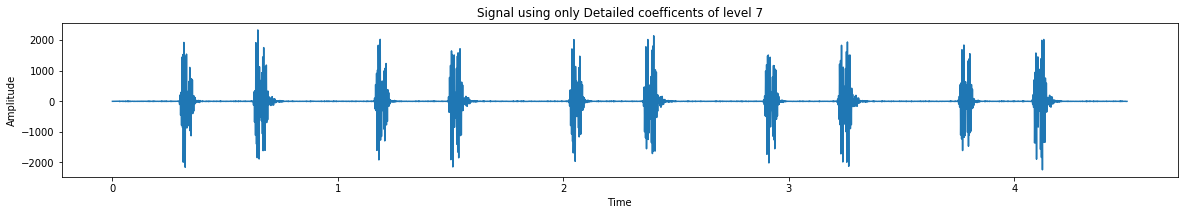

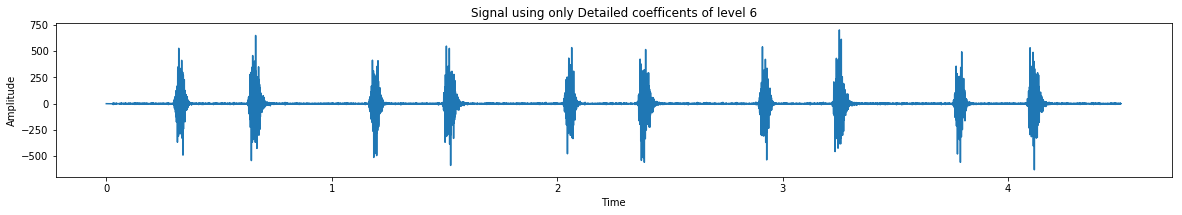

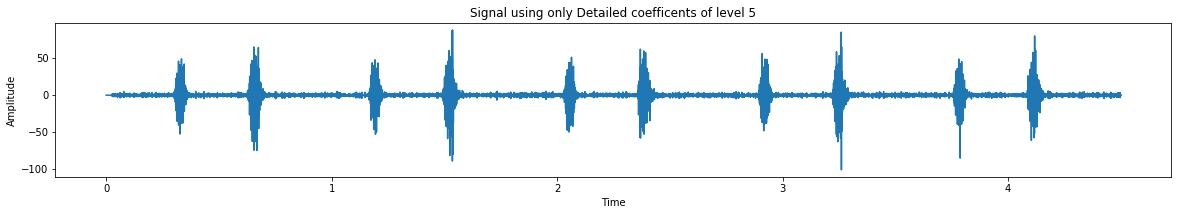

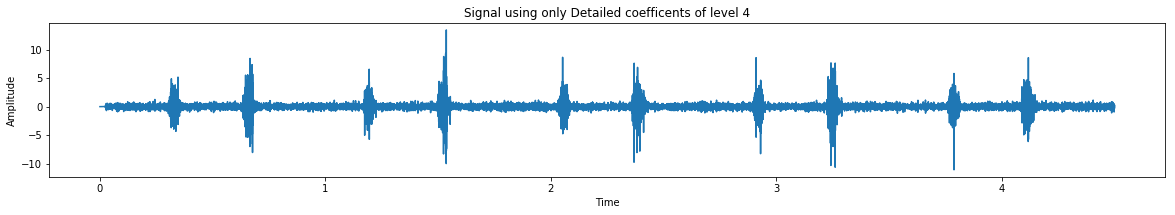

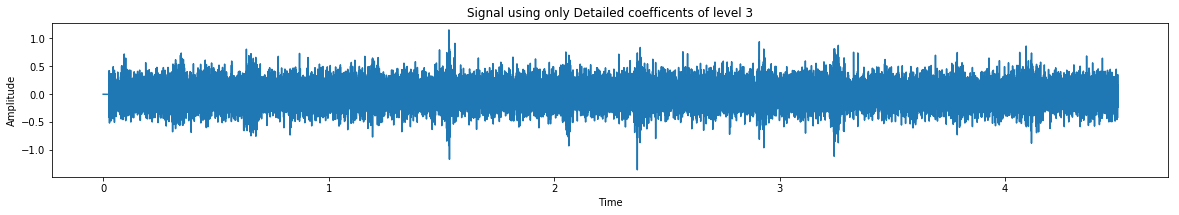

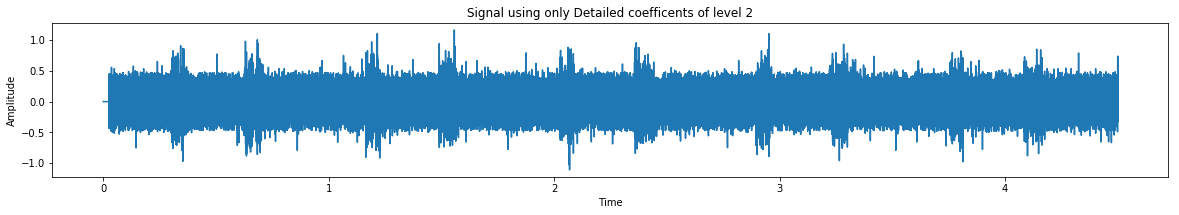

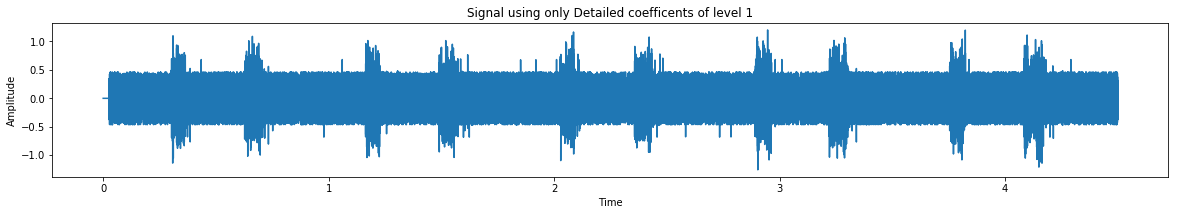

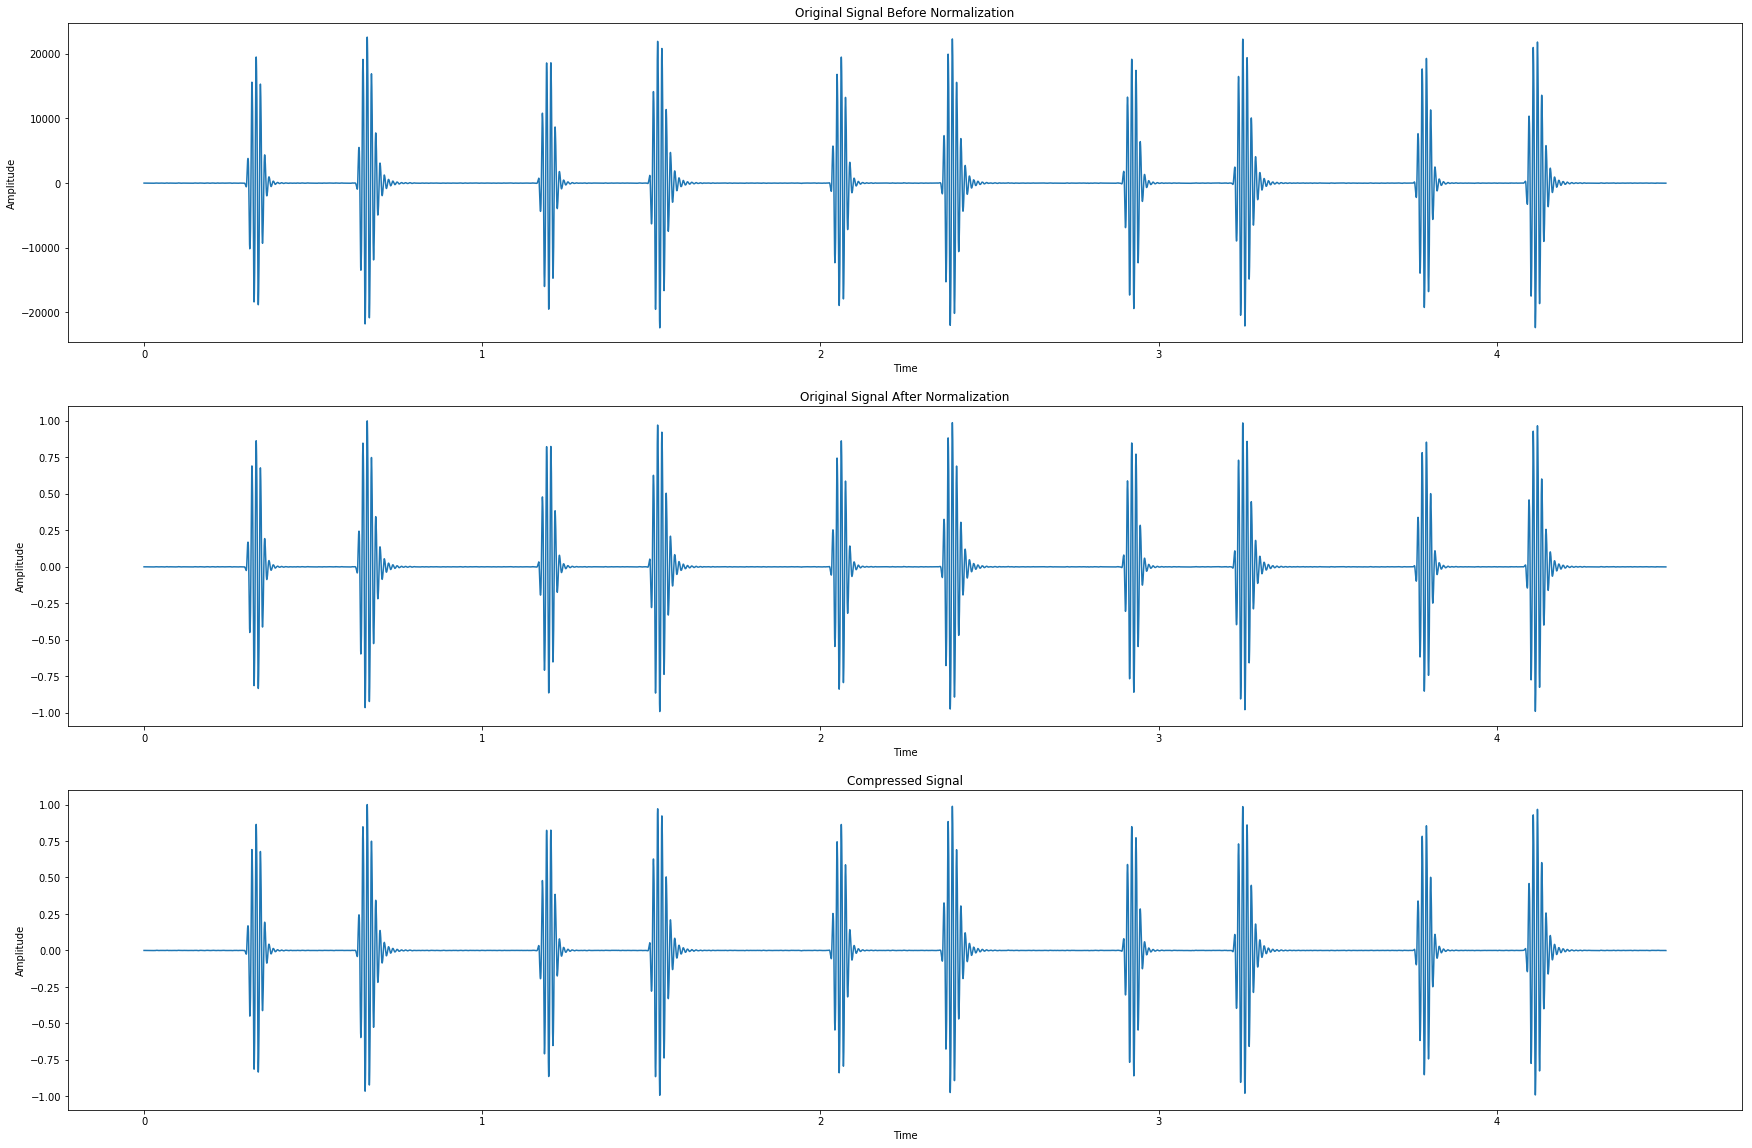

In [13]:
#RECONSTRUCT THE SIGNAL WITH REDUCED SIGNIFICANT COEFFICIENTS
R1=pywt.waverec(arr5, 'db20')

error=(np.sqrt(((np.sum(np.square(signal-R1)))/((np.sum(np.square(signal)))))))*100 
print ("Percent Root Mean Square Differeence: ",error,'%')
por=(((np.sum(np.square(signal)))-(np.sum(np.square(R1))))/(np.sum(np.square(R1))))
POR=(1-por)*100
print ("Percentage of reconstruction: ",POR,'%')


plt.figure(figsize=(30, 20)) 
plt.plot([1,2,3])
plt.subplot(311)
plt.plot(Timelimit,signals)
plt.title('Original Signal Before Normalization')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(312)
plt.plot(Timelimit,signal)
plt.title('Original Signal After Normalization')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(313)
plt.plot(Timelimit,R1)
plt.title('Compressed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


SNR before denoising:  4.999610192890439 db


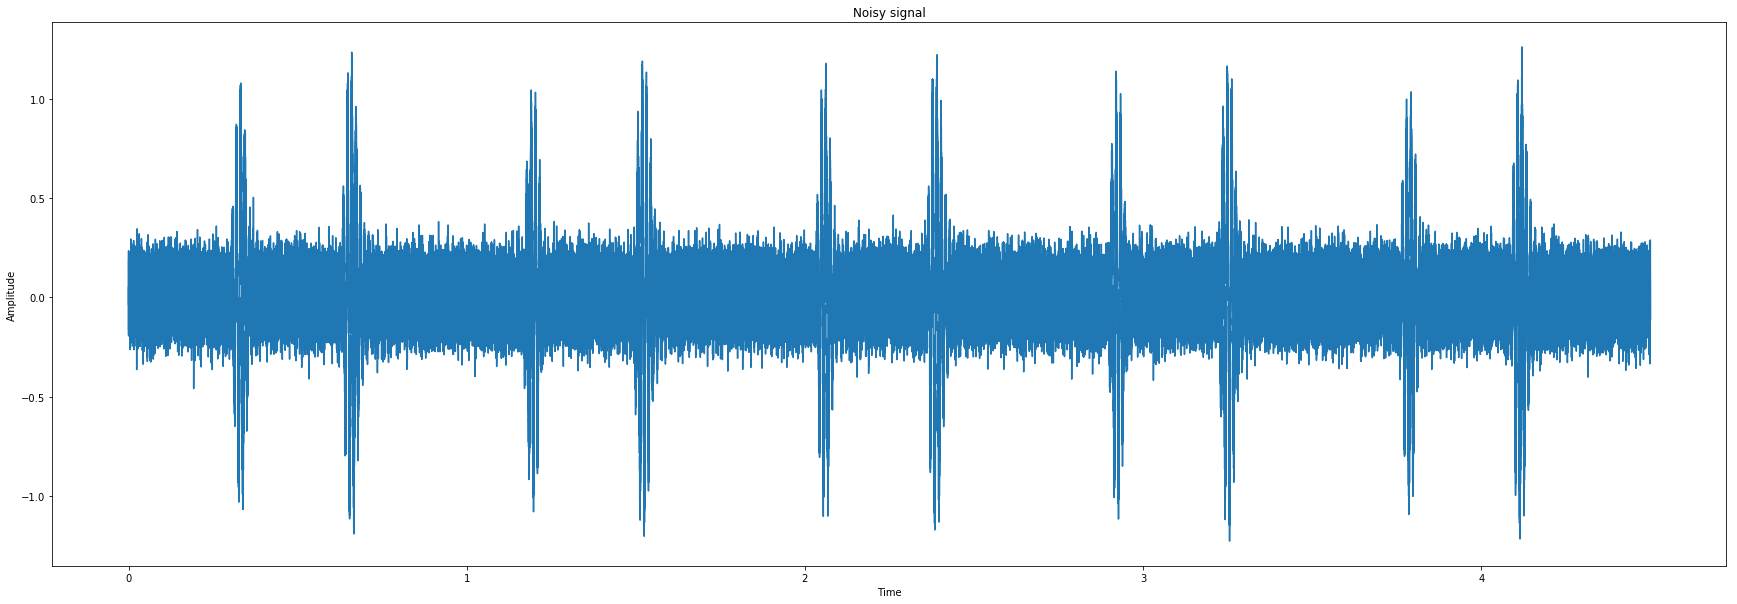

198450


In [14]:
#ADDING NOISE WITH THE SIGNAL
X1=R1
signalX = (np.array(X1))/(np.max(np.array(X1)))
sigma = 0.1
noise = sigma*np.random.randn(signalX.size)
ys =  signalX + noise
SNR1=10*np.log10((np.sum(np.square(signalX)))/(np.sum(np.square(signalX-ys ))))
print("SNR before denoising: ",SNR1,'db')
plt.figure(figsize=(30, 10))
plt.plot(Timelimit,ys)
plt.title('Noisy signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
print (signalX.size)

SNR after Denoising:  22.909933865089506 db
porSNR:  16.88498809474522 db


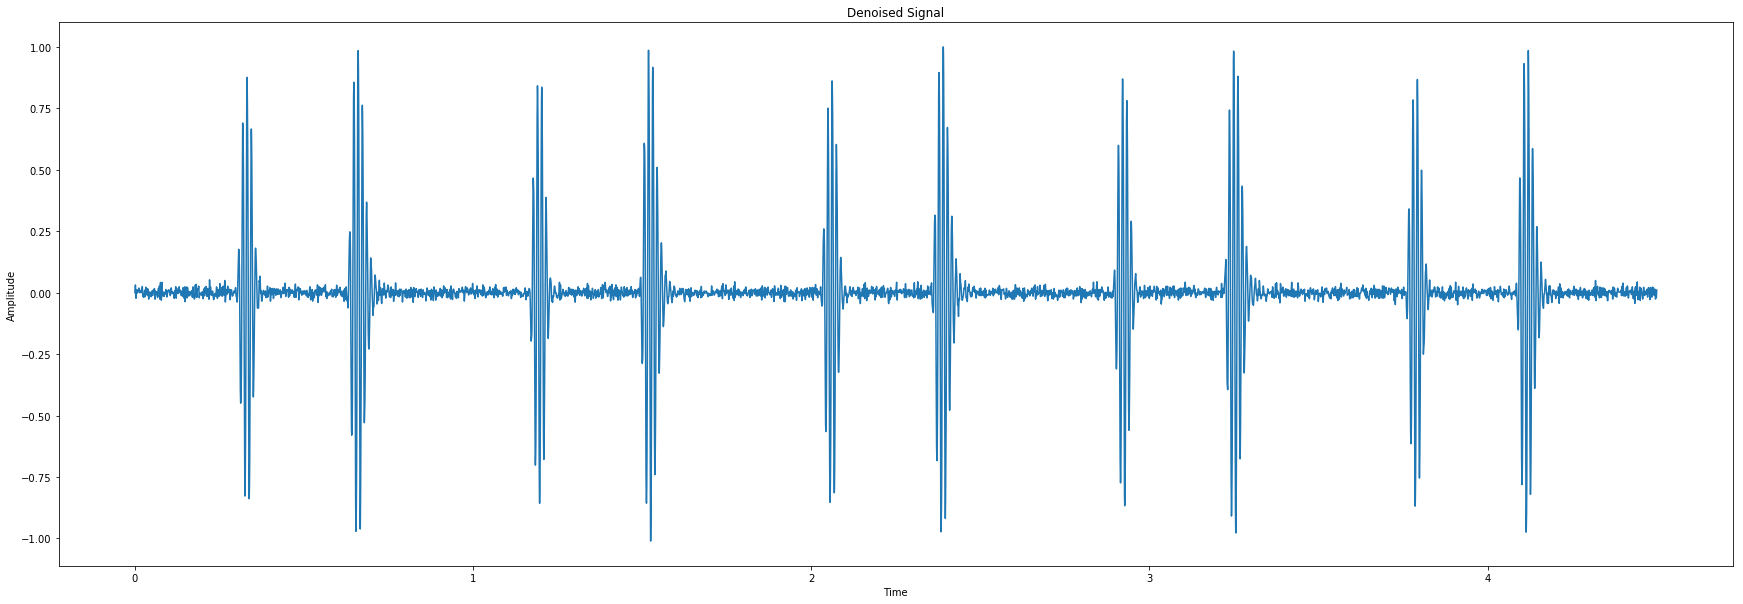

In [15]:
#DENOISING THE SIGNAL
from scipy import signal
coeffs=pywt.wavedec(ys,'bior4.4',level=6)
CA6,CD6,CD5,CD4,CD3,CD2,CD1=coeffs
n=len(ys)
signal3=pywt.upcoef('a', CA6, 'bior4.4', 6,take=n)
signal3=signal3
signal4= (np.array(signal3))/(np.max(np.array(signal3)))
b, a = signal.butter(3, 0.06)
x=np.arange(0,len(signal4))
DenoisedSignal = lfilter(b,a,signal4)
SNR2=10*np.log10((np.sum(np.square(signalX)))/(np.sum(np.square(signalX-DenoisedSignal ))))
print("SNR after Denoising: ",SNR2,'db')
porSNR=10*np.log10((np.sum(np.square(signalX)))/(np.sum(np.square(signalX-signal3 ))))
print("porSNR: ",porSNR,'db')

plt.figure(figsize=(30, 10))
plt.plot(Timelimit,DenoisedSignal)
plt.title('Denoised Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

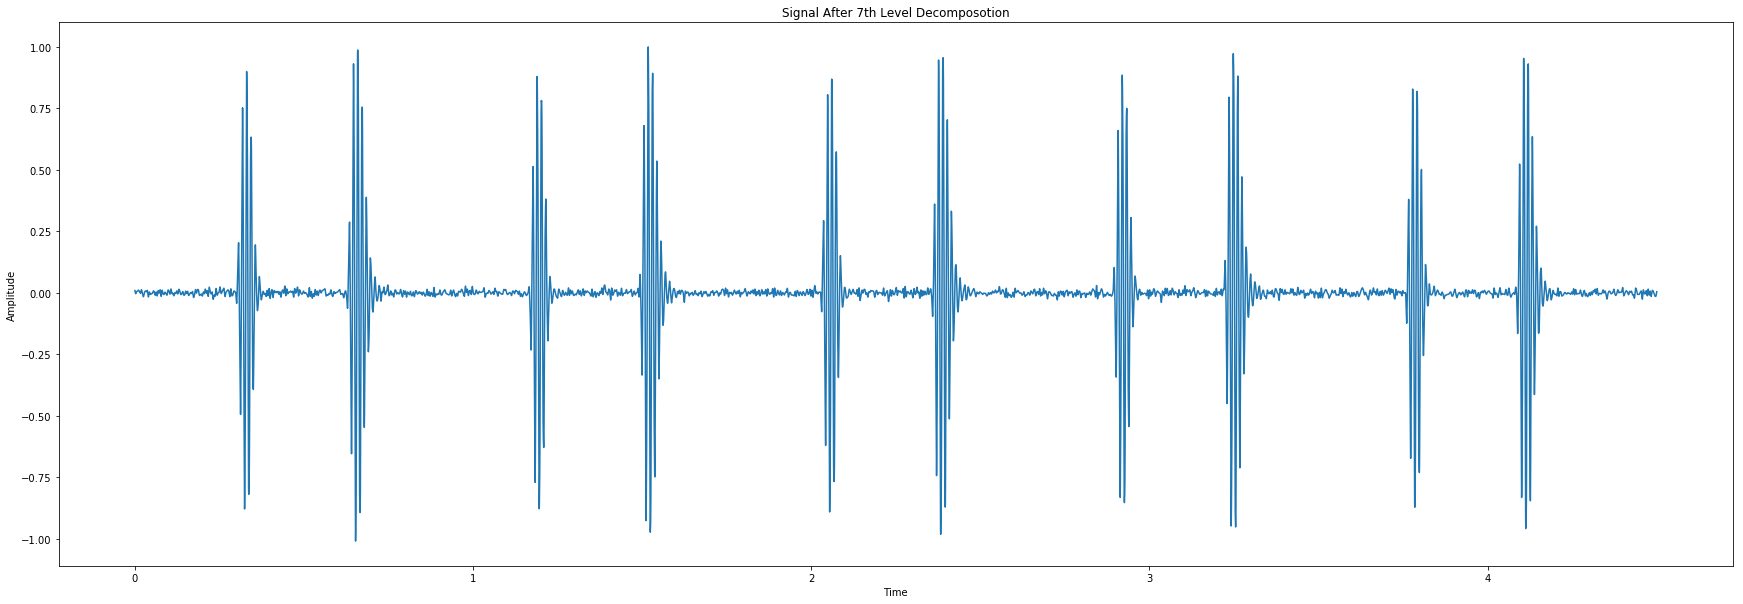

In [16]:
#REDUCING MURMUR(IF ANY) BY DECOMPOSING THE SIGNAL TO 7H LEVEL
coeffs=pywt.wavedec(DenoisedSignal,'bior4.4',level=7)
CA7,CD7,CD6,CD5,CD4,CD3,CD2,CD1=coeffs
n=len(DenoisedSignal)
signal5=pywt.upcoef('a', CA7, 'bior4.4', 7,take=n)
signal6 = (np.array(signal5))/(np.max(np.array(signal5)))


plt.figure(figsize=(30, 10))
plt.plot(Timelimit,signal6)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal After 7th Level Decomposotion')
plt.show()




In [17]:
#SHANON ENERGY ENVELOPE
Fs=sample_rate
seg=0.02
overlap=0.01
N=int(Fs*seg)
Es=[]
index=1
sig= (np.array(signal6))/(np.max(np.array(signal6)))
a=0
a= ((2*(len(sig)/N)-1))
b=int(a)

In [18]:
for i in range(1,b+1):
    xsq = sig[np.arange(index,(index+N-1))]**2;
    logxsq = np.log10(xsq);
    mult = xsq*logxsq;
    somme = np.sum(mult);
    E = -1/N*somme;
    index = index + int(np.floor(N/2));
    Es.append(E)
T_es = seg-overlap   
Es_n = Es - np.mean(Es);
Es_nn = Es_n/np.max(Es_n);

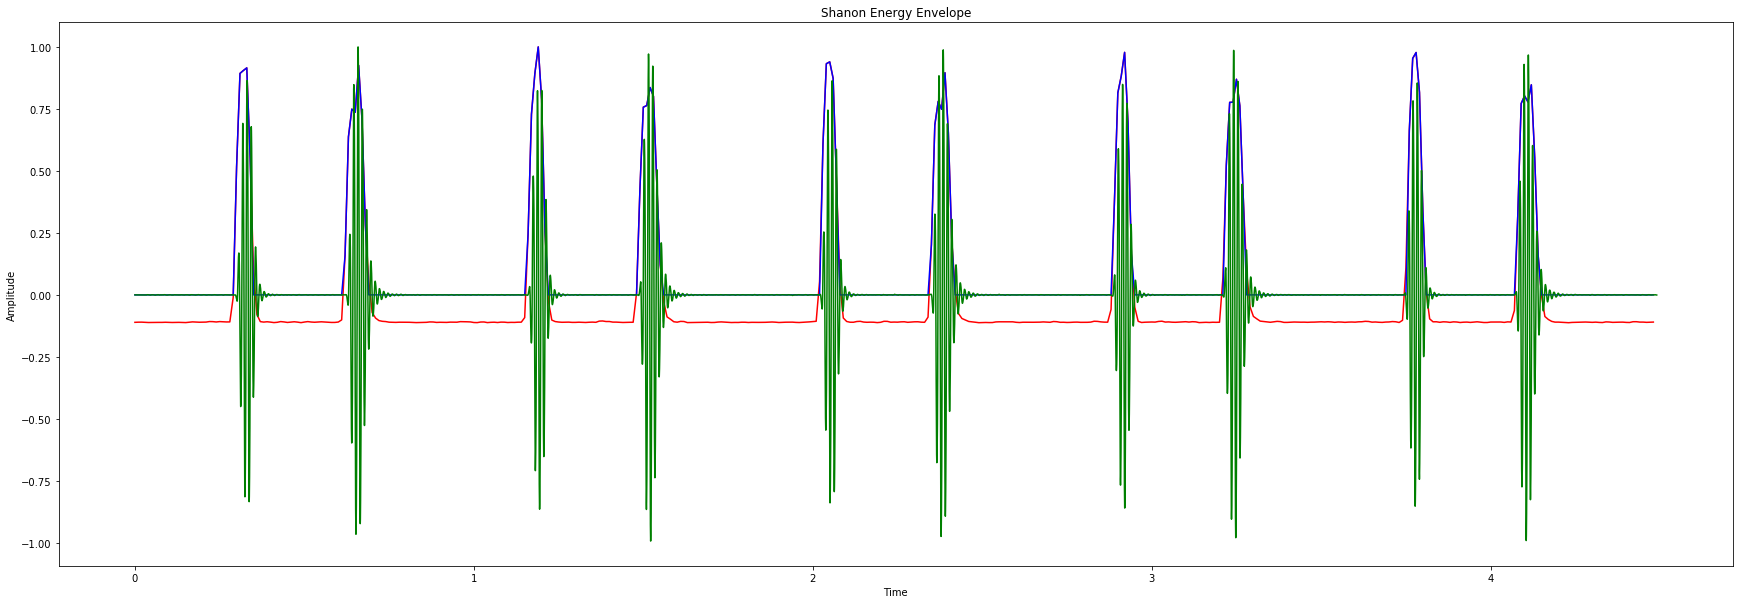

In [19]:
h=np.max(Es_nn);
thr1=0.11*h;
Time2 = np.arange(0, (len(Es_nn)-1)*T_es,T_es)
Time3 =np.arange(0, ((len(Es_n)-(len(Es_n)/len(sig)))*T_es+((T)/2)),(len(Es_n)/len(sig))*T_es)

plt.figure(figsize=(30, 10))
plt.plot(Time2,Es_nn,'r')
Es_nn[(Es_nn<thr1) & (Es_nn!=0)]=-0.001**15;
plt.plot(Time2,Es_nn,'b')
plt.plot(Time3,signalX,'g')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Shanon Energy Envelope')
plt.show()


In [20]:
#DETECTING THE ZERO CROSSING OF THE SIGNAL 
pt1 = 0
pt2 = 0
pt3 = 0
k = 0 
zerocross = []
value = []
start = []


while k<(len(Es_nn)):
    pt1 = Es_nn[k]
    pt2 = Es_nn[k]
    if pt1==0:
        zerocross.append(k) 
        value.append(pt1) 
        
        if k!=1 and pt3>pt1 and pt2>pt1:
            zerocross.append(k) 
            value.append(pt1)
            start.append(1)
            start.append(0)
            
        elif pt2>pt1:
            start.append(0)
            
        elif pt1>pt2:
            start.append(1)
            
        pt_3 = pt_2
        k = k +2
        
    elif pt1<0 and pt3>0 and pt2>0:
        zerocross.append(k)
        zerocross.append(k)
        value.append(pt1)
        value.append(pt1)
        pt3 = pt2
        start.append(1)
        start.append(0)
        
    elif pt1>0 and pt3<0 and pt2<0:
        zerocross.append(k)
        zerocross.append(k)
        value.append(pt1)
        value.append(pt1)
        k = k + 2;
        pt3 = pt2;
        start.append(0);
        start.append(1);
       
    elif pt1>0 and pt3<0 and (abs(pt3))<pt1:
        zerocross.append(k-1) # chooses the point before for the cross because it is closer to zero
        value.append(pt3)
        k = k +2;
        pt3 = pt2;
        start.append(0)
        
    elif pt1>0 and pt3<0 and (abs(pt3))>=pt1:
        zerocross.append(k) # chooses the point before for the cross because it is closer to zero
        value.append(pt1)
        k = k +2
        pt3 = pt2
        start.append(0)
        
    elif pt1<0 and pt3>0 and (abs(pt3))<pt1:
        zerocross.append(k-1)
        value.append(pt3)
        k = k +2
        pt3= pt2
        start.append(1)
        
    elif pt1<0 and pt3>0 and (abs(pt3))>=pt1:
        zerocross.append(k)
        value.append(pt1)
        k = k +2
        pt3 = pt2
        start.append(1)
            
    else:
        k = k+1;
        pt3 = pt1;
        
    if len(start)==1 and start[0]==1: # avoids starting in the middle of a sound
        start = [];
        zerocross = [];
        value = [];
     
    
    if (k)>=(len(Es_nn)) and start[len(start)-1]==0:   #to finish with an end of his if finished with a positive slope, it is removed
        start = start[:-1]
        zerocross = zerocross[:-1]
        value = value[:-1]

   


In [21]:
Time_zero = Time2[zerocross]  
zero_cross = np.zeros(len(Time_zero))

The numer of Zero_Crossing Points:-> 20
Values of Zero_Crossing Points:->  [0.29 0.35 0.61 0.69 1.15 1.22 1.48 1.56 2.02 2.08 2.34 2.42 2.88 2.95
 3.21 3.28 3.75 3.81 4.07 4.15]


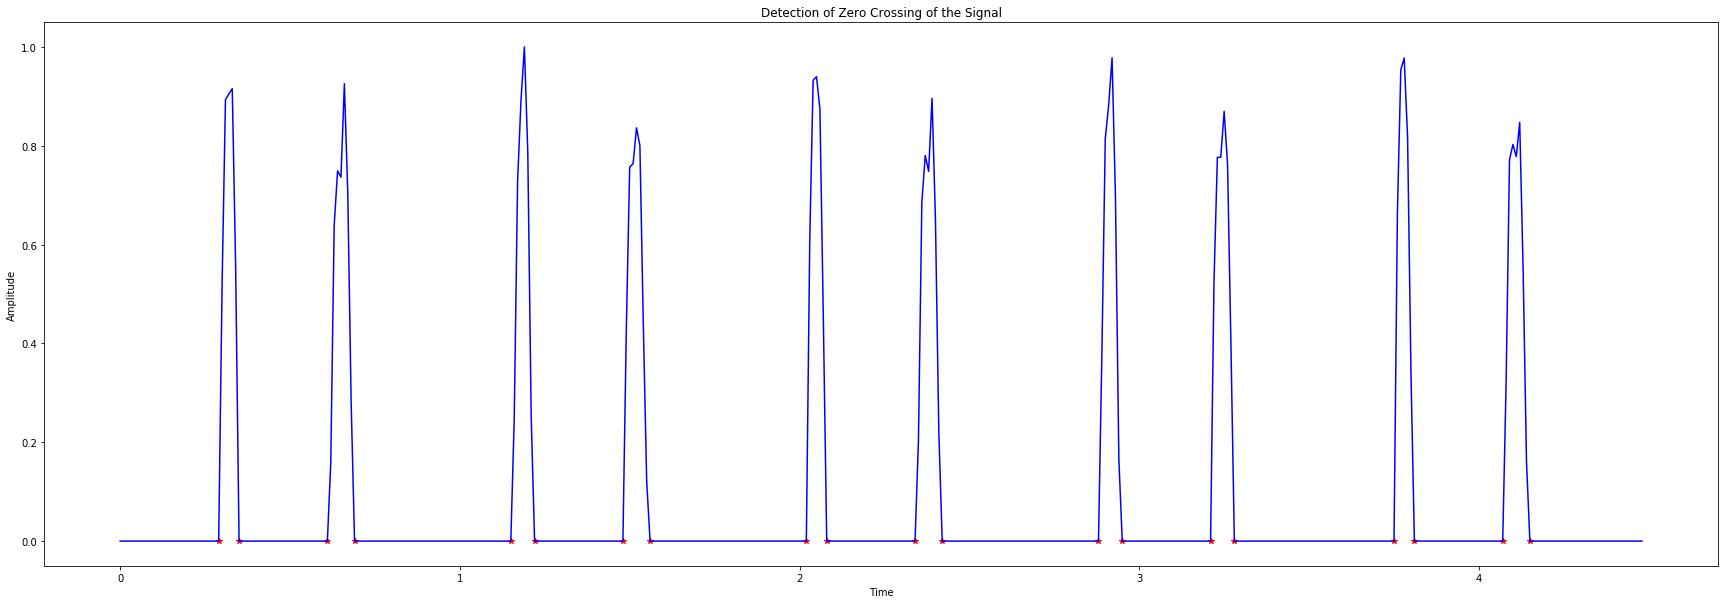

In [22]:
print ("The numer of Zero_Crossing Points:->",len(zero_cross))
print ("Values of Zero_Crossing Points:-> ",Time_zero)


plt.figure(figsize=(30, 10))
plt.plot(Time_zero,zero_cross,'r*')
plt.plot(Time2,Es_nn,'b')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Detection of Zero Crossing of the Signal')
plt.show()

In [23]:
#DETECTING THE START,STOP AND DURATION OF THE HEART SOUND SIGNAL
Tstart = []
Tstop = []
oi= (len(start))
aint=int(oi)
for l in range(0,aint):
    if start[l]==0:
        Tstart.append(Time_zero[l]);
    else:
        Tstop.append(Time_zero[l]);
        
print ("Starting Point of The Sound: ", np.around(Tstart,3))
print ("Stopping Point of The Sound: ", np.around(Tstop,3))
a = np.array(Tstart)
b = np.array(Tstop)
c = b-a
print ("Duration of sound S1 and S2: ", c)


Starting Point of The Sound:  [0.29 0.61 1.15 1.48 2.02 2.34 2.88 3.21 3.75 4.07]
Stopping Point of The Sound:  [0.35 0.69 1.22 1.56 2.08 2.42 2.95 3.28 3.81 4.15]
Duration of sound S1 and S2:  [0.06 0.08 0.07 0.08 0.06 0.08 0.07 0.07 0.06 0.08]


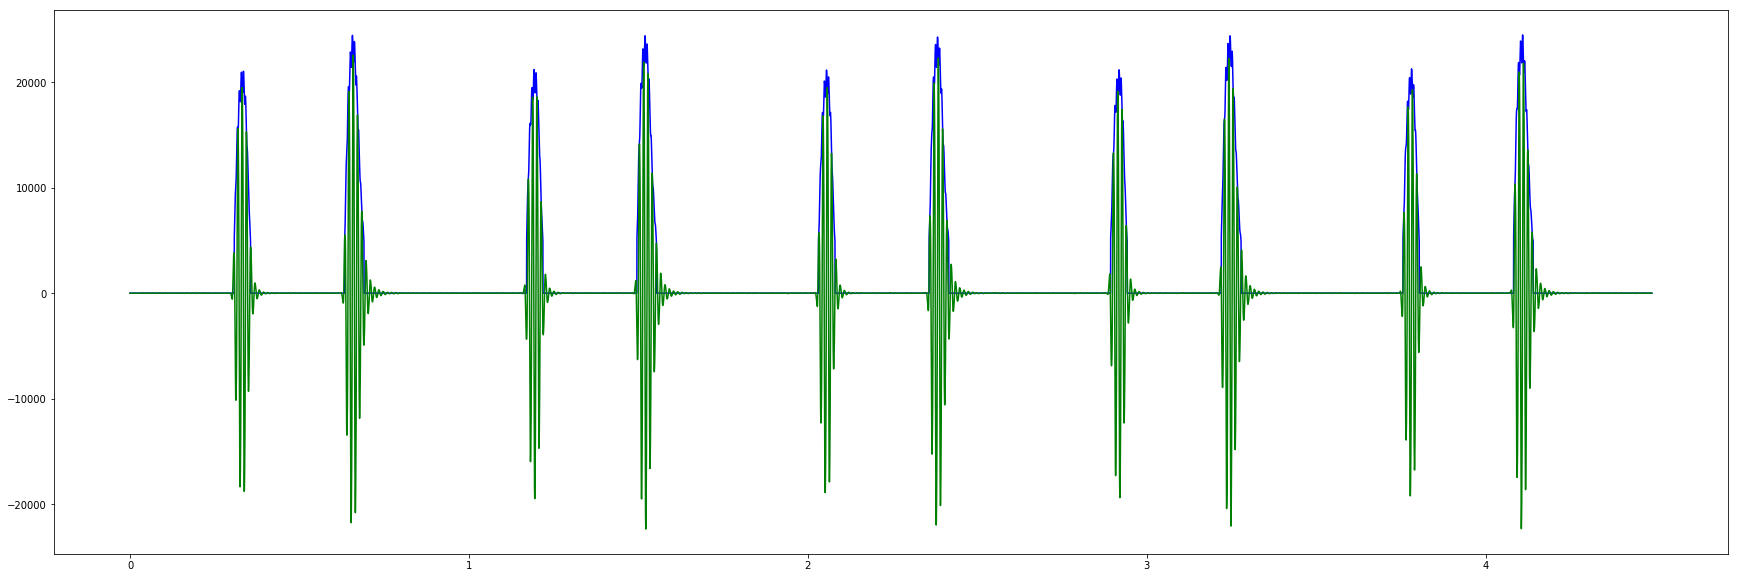

Max amplitude of the Signal:  24479.351
Amplitude of the Heart sounds:  [21039.442 24431.183 21192.617 24402.252 21139.626 24270.969 21171.073
 24396.135 21261.449 24479.351]


Text(0.5, 1.0, 'Peak Detection')

In [24]:
#DETECTING THE PEAK TO DETERMINE THE AMPLITUDE OF THE SIGNAL
signal7 = hilbert(signal2)
amplitude_envelope = np.abs(signal7)
MAX=np.max(amplitude_envelope);
thr1=0.20*MAX;
amplitude_envelope[(amplitude_envelope<thr1)]=0;
indexes = peakutils.indexes(amplitude_envelope, thres=0.35, min_dist=2500)

plt.figure(figsize=(30, 10))
plt.plot(Time3,amplitude_envelope,'b')
plt.plot(Time3,signal2,'g')
plt.show()

print ("Max amplitude of the Signal: ",np.around(max(amplitude_envelope),3))
print("Amplitude of the Heart sounds: ",np.around(amplitude_envelope[indexes],3))
plt.figure(figsize=(20,10))
x=x = np.arange(0, len(amplitude_envelope))
pplot(Time3,amplitude_envelope,indexes)
plt.plot(Time3,signal2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Peak Detection')

(20, 388)


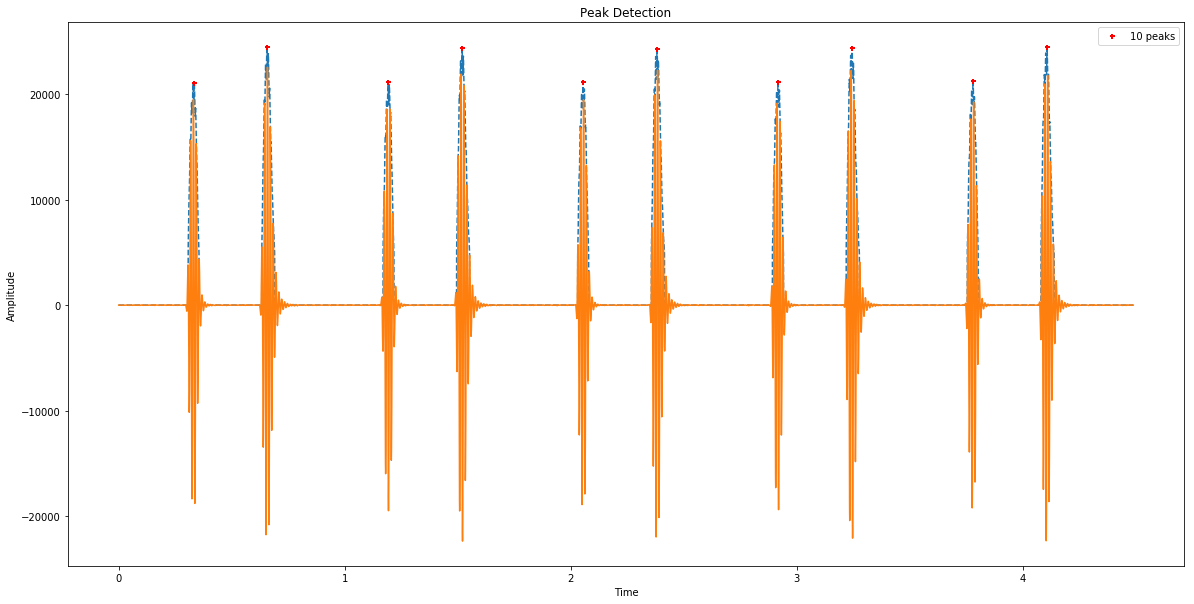

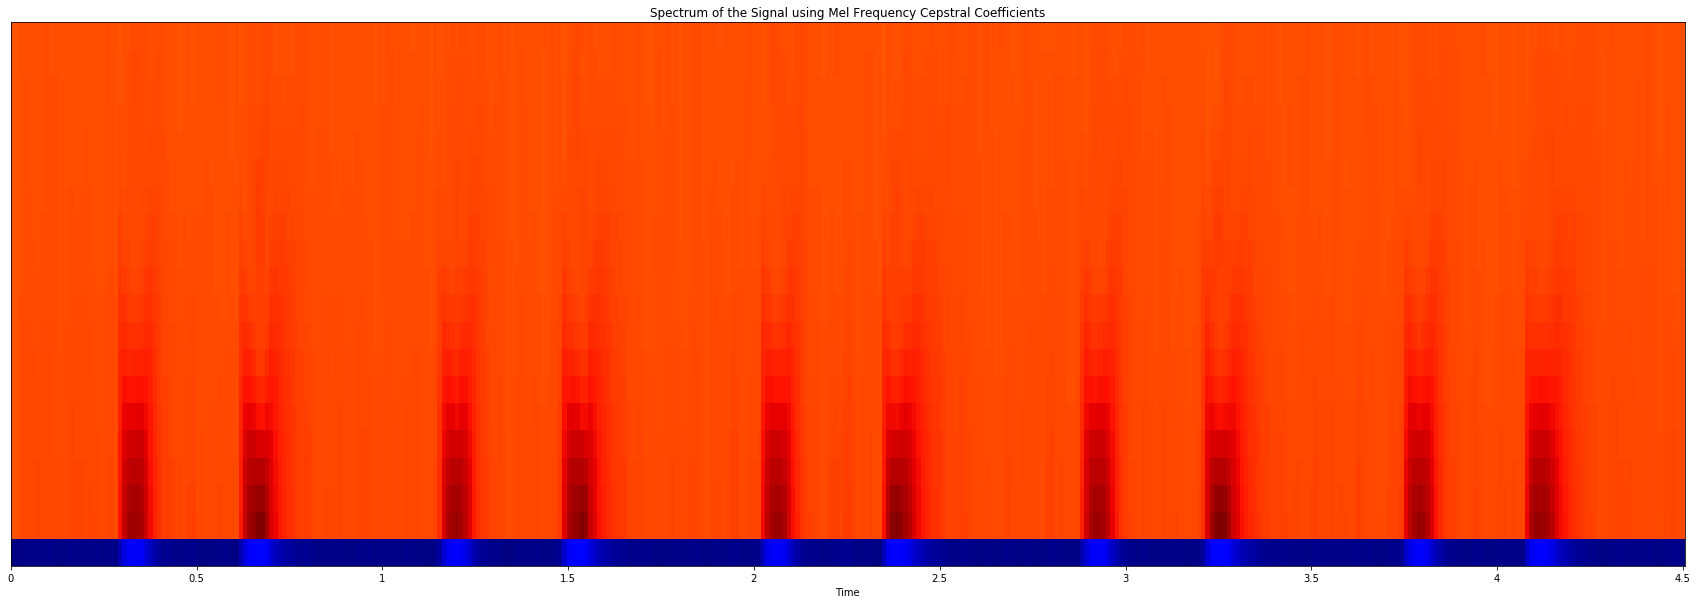

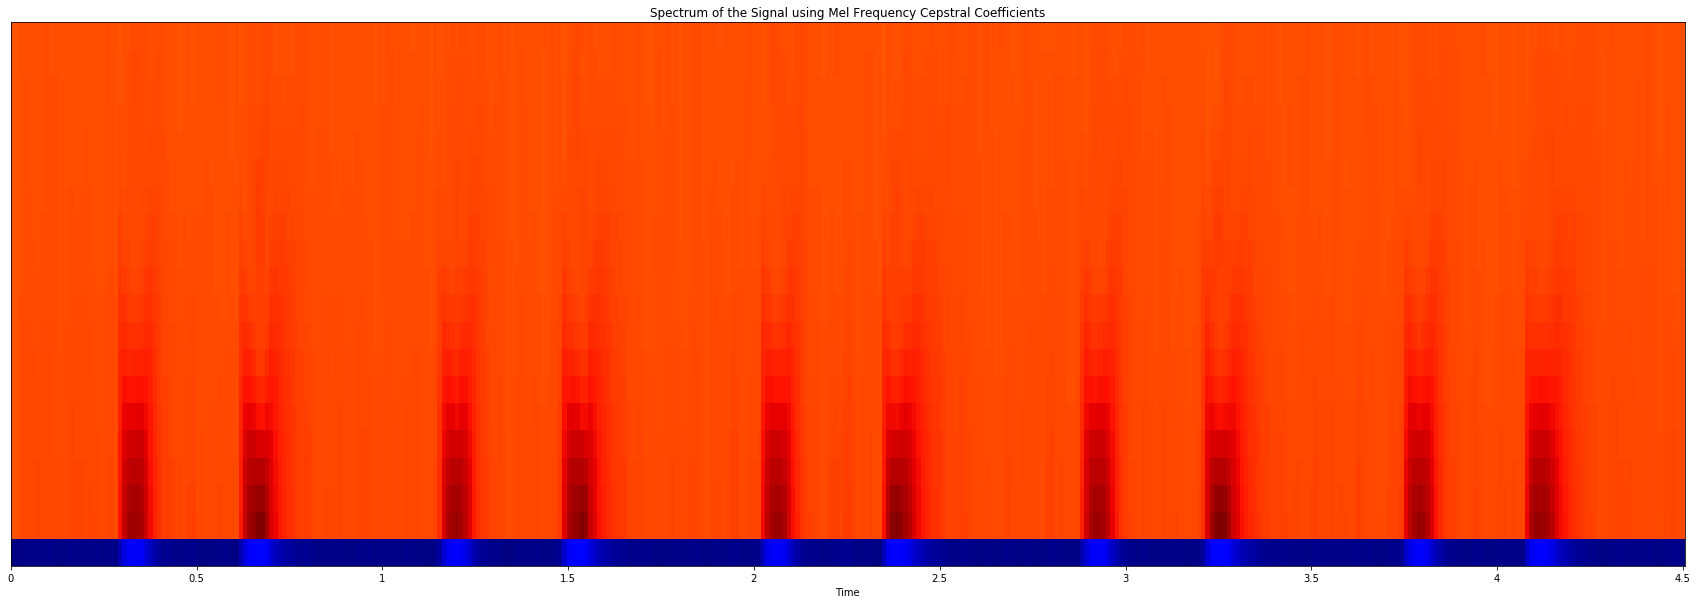

In [26]:
#PLOTTING THE SPECTRUM OF THE SIGNAL USING MFCC
mfccss = librosa.feature.mfcc(signalX, sr=sample_rate)
mels=librosa.feature.melspectrogram(signalX, sr=sample_rate)
print (mfccss.shape)
plt.figure(figsize=(30, 10)) 
plt.title('Spectrum of the Signal using Mel Frequency Cepstral Coefficients')
librosa.display.specshow(mfccss, sr=sample_rate, x_axis='time', cmap='jet')
plt.show()


In [27]:
#FEATURE EXTRACTIN USING MFCC AND CLASSIFICATION USING TENSORFLOW AND DEEP NEURAL NETWORK
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=128).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    print (len(mfccs),len(mel))
    return mfccs,mel




def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    p=0
    features, labels = np.empty((0,256)), np.empty((0))
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
                mfccs, mel= extract_feature(fn)
            except Exception as e:
                print (e)
                continue
            ext_features = np.hstack([mfccs,mel])
            features = np.vstack([features,ext_features])
            df=pd.read_csv("/data/Summer2019/TanzilIResearch/classification2/100files/REFERENCE.csv")
            labelss=df[df.columns[1]]
            labels = np.append(labels,labelss[p])
            print (len(labelss),len(labels),labelss[p],p,fn) 
            p+=1;
    return np.array(features),np.array(labels, dtype = np.int)


def test_parse(file_name):
    print ("FINAL")
    features = np.empty((0,256))
    try:
        mfccs, mel = extract_feature(file_name)
    except Exception as e:
        print (e)
    ext_features = np.hstack([mfccs,mel])
    features = np.vstack([features,ext_features])
    return np.array(features)

def classify(sound_path):
    os.system("aplay %s"%sound_path)
    pred = sess.run(tf.argmax(y_,1),feed_dict = {X: test_parse(sound_path)})
    print ("pred",pred)
    if pred==[0]:
        print ("0 The Signal is Normal")
    else:
        print ("1 The Signal is Abnormal")

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode
#print (len(labels)) 

In [28]:
parent_dir = 'classification2'
sub_dirs = ['100files']
features, labels = parse_audio_files(parent_dir,sub_dirs)
print ("features: ",len(features)," labels: ",len(labels))

128 128
132 1 1.0 0 classification2/100files/a0020.wav
128 128
132 2 1.0 1 classification2/100files/a0072.wav
128 128
132 3 1.0 2 classification2/100files/a0034.wav
128 128
132 4 1.0 3 classification2/100files/a0001.wav
128 128
132 5 1.0 4 classification2/100files/a0065.wav
128 128
132 6 1.0 5 classification2/100files/a0013.wav
128 128
132 7 0.0 6 classification2/100files/a0054.wav
128 128
132 8 1.0 7 classification2/100files/a0002.wav
128 128
132 9 0.0 8 classification2/100files/a0035.wav
128 128
132 10 1.0 9 classification2/100files/a0023.wav
128 128
132 11 0.0 10 classification2/100files/a0048.wav
128 128
132 12 0.0 11 classification2/100files/a0036.wav
128 128
132 13 1.0 12 classification2/100files/a0016.wav
128 128
132 14 1.0 13 classification2/100files/a0044.wav
128 128
132 15 1.0 14 classification2/100files/a0009.wav
128 128
132 16 0.0 15 classification2/100files/a0058.wav
128 128
132 17 1.0 16 classification2/100files/a0093.wav
128 128
132 18 1.0 17 classification2/100files/a00

In [29]:
labels = one_hot_encode(labels)
train_x,test_x,train_y,test_y=train_test_split(features,labels,test_size = 0.1,random_state=0)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(91, 256)
(91, 2)
(11, 256)
(11, 2)


In [30]:
#I GOT 100% accuracy with this option and data in classification 2
training_epochs =17000
n_dim = features.shape[1]
n_classes = 2
n_hidden_units_one = 500
n_hidden_units_two = 500
n_hidden_units_three = 500
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.001
model_path= "C:\\Users\\Tanzil\\classification2\\100files"

In [31]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.sigmoid(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W_3 = tf.Variable(tf.random_normal([n_hidden_units_two,n_hidden_units_three], mean = 0, stddev=sd))
b_3 = tf.Variable(tf.random_normal([n_hidden_units_three], mean = 0, stddev=sd))
h_3 = tf.nn.relu(tf.matmul(h_2,W_3) + b_3)

W = tf.Variable(tf.random_normal([n_hidden_units_three,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_3,W) + b)


init = tf.global_variables_initializer()
saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
sess = tf.Session()
sess.run(init)


Instructions for updating:
Use tf.cast instead.


In [33]:
cost_history = np.empty(shape=[1],dtype=float)
accuracy_history=[]
Testdata_original,Testdata_pred = None, None
sess=tf.Session()
sess.run(init)
for epoch in range(training_epochs):            
    _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,cost)

Traindata_pred = sess.run(tf.argmax(y_,1),feed_dict={X: train_x})
Traindata_original = sess.run(tf.argmax(train_y,1))    
correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy0 = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
Train_accuracy=(sess.run(accuracy0,feed_dict={X: train_x,Y: train_y}))
accuracy_history.append(Train_accuracy)
 
Testdata_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
Testdata_original = sess.run(tf.argmax(test_y,1))
pred_y = sess.run(y_,feed_dict={X: test_x})
print ('epoch: ',epoch, '-->', 'cost: ', cost,'-->', 'accuracy: ',np.around(Train_accuracy*100,2),"%")
print ("Prediction of label of Traing data: ", Traindata_pred)
print ("Original label of Training Data:    ",Traindata_original)
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)
correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
Testaccuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ",np.around((sess.run(Testaccuracy,feed_dict={X: test_x,Y: test_y} ))*100,2),"%")


epoch:  16999 --> cost:  0.20940724 --> accuracy:  91.21 %
Prediction of label of Traing data:  [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1]
Original label of Training Data:     [1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1]
Model saved in file: C:\Users\Tanzil\classification2\100files
Test Accuracy:  54.55 %


Test Accuracy:  54.55 %
Prediction of label of Testing data:  [1 1 1 1 1 1 1 1 1 1 1]
Original label of Testing Data:       [0 0 1 1 1 0 1 1 0 0 1]


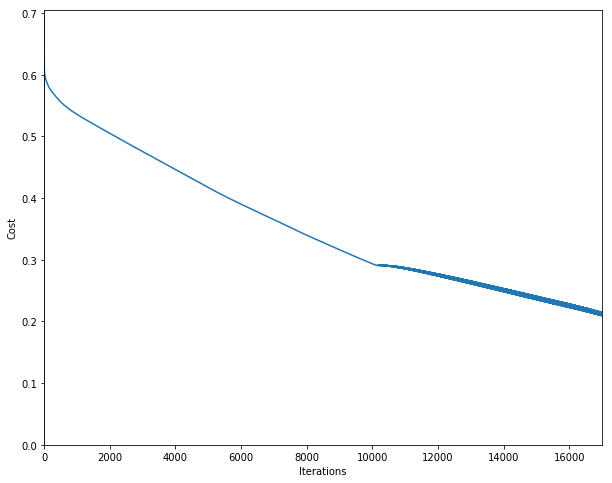

In [34]:
correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
Testaccuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ",np.around((sess.run(Testaccuracy,feed_dict={X: test_x,Y: test_y} ))*100,2),"%")
print ("Prediction of label of Testing data: ", Testdata_pred)
print ("Original label of Testing Data:      ",Testdata_original)

fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()



In [35]:
classify("classification2/100files/Allwavfile fro qualifyingexam/Normals.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [36]:
classify("classification2/100files/Allwavfile fro qualifyingexam/02 Apex, Split S1, Supine, Bell converted.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [37]:
classify("classification2/100files/Allwavfile fro qualifyingexam/03 Apex, S4, LLD, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [38]:
classify("classification2/100files/Allwavfile fro qualifyingexam/04 Apex, Mid Sys Click, Supine, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [39]:
classify("classification2/100files/Allwavfile fro qualifyingexam/05 Apex, S3, LLD, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [40]:
classify("classification2/100files/Allwavfile fro qualifyingexam/06 Apex, Early Sys Mur, Supine, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [41]:
classify("classification2/100files/Allwavfile fro qualifyingexam/07 Apex, Mid Sys Mur, Supine, Bell (1).wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [42]:
classify("classification2/100files/Allwavfile fro qualifyingexam/08 Apex, Late Sys Mur, Supine, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [43]:
classify("classification2/100files/Allwavfile fro qualifyingexam/09 Apex, Holo Sys Mur, Supine, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [44]:
classify("classification2/100files/Allwavfile fro qualifyingexam/10 Apex, Sys Click & Late Sys Mur, LLD, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [45]:
classify("classification2/100files/Allwavfile fro qualifyingexam/11 Apex, S4 & Mid Sys Mur, LLD, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [46]:
classify("classification2/100files/Allwavfile fro qualifyingexam/12 Apex, S3 & Holo Sys Mur, LLD, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [47]:
classify("classification2/100files/Allwavfile fro qualifyingexam/13 Apex, OS & Dias Mur, LLD, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [48]:
classify("classification2/100files/Allwavfile fro qualifyingexam/14 Aortic, Normal S1 S2, Sitting, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [49]:
classify("classification2/100files/Allwavfile fro qualifyingexam/15 Aortic, Sys Mur & Absent S2, Sitting, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [50]:
classify("classification2/100files/Allwavfile fro qualifyingexam/16 Aortic, Early Dias Mur, Sitting, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [51]:
classify("classification2/100files/Allwavfile fro qualifyingexam/17 Aortic, Sys & Dias Mur, Sitting, Bell.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [52]:
classify("classification2/100files/Allwavfile fro qualifyingexam/18 Pulm, Single S2, Supine, Diaph.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [53]:
classify("classification2/100files/Allwavfile fro qualifyingexam/19 Pulm, Spilt S2 Persistent, Supine, Diaph.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [54]:
classify("classification2/100files/Allwavfile fro qualifyingexam/20 Pulm_Spilt_S2_Transient_Supine_Diaph.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [55]:
classify("classification2/100files/Allwavfile fro qualifyingexam/21 Pulm, Eject Sys Mur & Trans Split S2, Supine, Diaph.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [56]:
classify("classification2/100files/Allwavfile fro qualifyingexam/22 Pulm, Split S2 & Eject Sys Mur, Supine, Diaph.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [57]:
classify("classification2/100files/Allwavfile fro qualifyingexam/23 Pulm, Eject Sys Mur & Single S2 & Eject Click, Supine, Diaph.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal


In [58]:
classify("classification2/100files/Allwavfile fro qualifyingexam/Normal1.wav")

FINAL
128 128
pred [1]
1 The Signal is Abnormal
